<a href="https://colab.research.google.com/github/waveology/kitchen/blob/main/introduccion_cartopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a Cartopy


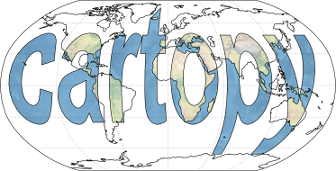

* [Web del proyecto](https://scitools.org.uk/cartopy/docs/latest/)
* [Referencia de la API](https://scitools.org.uk/cartopy/docs/latest/reference/index.html)
* [Galería](https://scitools.org.uk/cartopy/docs/latest/gallery/index.html)

* **¿Qué es Cartopy?** Una extensión de Python para dibujar mapas y datos sobre ellos.

* **¿Cómo se usa Cartopy?** Partiendo de una proyección cartográfica añadimos elementos geográficos y superponemos los datos.

* **¿Cuándo usar Cartopy?** Cuando se requiera la presentación de datos en un contexto geográfico

* **¿Por qué Cartopy?** Porque es fácil de usar en relación con otras alternativas





## Instalación
---

In [ ]:
# Esta línea parece ser necesaria en Colab
# ----------------------------------------------
!pip -q install --no-binary shapely shapely --force

# Instalación de Cartopy
# ------------------------
!pip -q install cartopy

##Descarga de datos
---

Descargamos ficheros de datos del reanálisis ERA/ECMWF para experimentar

In [ ]:
ifile = 'era5_pl_vt_2020_europa_025.rar'
!wget -q --no-check-certificate https://owncloud.aemet.es/index.php/s/yWpdSTonSFuJz6c/download -O {ifile} && unrar -o+ e {ifile} && rm -f {ifile}
!mv era5_pl_vt_2020_europa_025.nc era5_2000.nc

##Importa extensiones Python

In [ ]:
# Extensión principal
# -------------------------------------------
import cartopy.crs as ccrs

# Extensión gráfica genérica de Python
# ---------------------------------------
import matplotlib.pyplot as plt

# Extensión de cálculo
# -----------------------
import numpy as np

##Gráficos de mapas y proyecciones cartográfcas

Hay más de una forma de componer un mapa en Cartopy. La que se presenta aquí resulta muy versátil y facilita la posibilidad de escalar la complejidad del gráfico.

* Empezamos por crear una figura contenedora a la que asignamos las dimensiones del gráfico

* Añadimos uno o más gráficos a la figura

* Para cada gráfico de la figura elegimos la proyección cartográfica de entre las de [esta lista](https://scitools.org.uk/cartopy/docs/latest/reference/projections.html?highlight=projections).

###Ejemplo: un mapa simple

In [ ]:
# Definimos la figura que actúa como contenedor y le asignamos las dimensiones
# -----------------------------------------------------------------------------
fig = plt.figure(figsize=[10, 5])

# Añadimos un gráfico a la figura
# Los índices corresponden respectivamente a la fila, la columna y la posición del gráfico
# La proyección cartográfica elegida en este caso es la cilíndrica equidistante ('Plate Carrée')
# ----------------------------------------------------------------------------------------------
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())

# Añadimos un fondo genérico con océanos y continentes
# -----------------------------------------------------
ax.stock_img()

plt.show()

###Ejemplo: múltiples mapas en el mismo gráfico

In [ ]:
# Definimos la figura que actúa como contenedor y le asignamos las dimensiones
# -----------------------------------------------------------------------------
fig = plt.figure(figsize=[10, 5])

# Añadimos un gráfico a la figura
# Los índices corresponden respectivamente a la fila, la columna y la posición del gráfico
# Elegimos diferentes proyecciones en cada uno
# -----------------------------------------------------------------------------------------------
ax1 = fig.add_subplot(2,2,1,projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(2,2,2,projection=ccrs.Orthographic())
ax3 = fig.add_subplot(2,2,3,projection=ccrs.Mollweide())
ax4 = fig.add_subplot(2,2,4,projection=ccrs.Sinusoidal())

for ax in (ax1,ax2,ax3,ax4) :
   # Se asegura de que el mapa llega a los límites de la proyección
   # ---------------------------------------------------------------
   ax.set_global()

   # Añadimos el fondo genérico con océanos y continentes
   # -----------------------------------------------------
   ax.stock_img()


plt.show()

##Paralelos y meridianos

Las líneas geográficas se añaden con la función ***gridlines***, que admite múltiples argumentos para refinar el resultado.

###Ejemplo: líneas geográficas en diferentes proyecciones

In [ ]:
# Definimos la figura que actúa como contenedor y le asignamos las dimensiones
# -----------------------------------------------------------------------------
fig = plt.figure(figsize=[10, 5])

# Añadimos un gráfico a la figura
# ----------------------------------------------------------------------------------------------
ax1 = fig.add_subplot(1,2,1,projection=ccrs.Orthographic())
ax2 = fig.add_subplot(1,2,2,projection=ccrs.PlateCarree())

# Añadimos paralelos y meridianos
# ----------------------------------
ax1.gridlines(draw_labels=False,   # etiquetas
             color='red',          # color
             ls='--',              # estilo
             lw=1                  # grosor
             )

ax2.gridlines(draw_labels=True,    # etiquetas
             dms=True,             # grados,minutos y segundos
             x_inline=False,       # etiquetas dentro/fuera del gráfico
             y_inline=False,       #
             color='blue',         # color
             ls='-',               # estilo
             lw=2                  # grosor
             )

for ax in (ax1,ax2) :
   # Se asegura de que el mapa llega a los límites de la proyección
   # ---------------------------------------------------------------
   ax.set_global()

   # Añadimos el fondo genérico con océanos y continentes
   # -----------------------------------------------------
   ax.stock_img()


plt.show()

###Ejemplo: especificación detallada de líneas geográficas

In [ ]:
# Posicionamiento de etiquetas
# -------------------------------
import matplotlib.ticker as mticker

# Definimos la figura que actúa como contenedor y le asignamos las dimensiones
# -----------------------------------------------------------------------------
fig = plt.figure(figsize=[18, 5])

# Añadimos un gráfico a la figura
# ----------------------------------------------------------------------------------------------
ax = fig.add_subplot(1,2,1,projection=ccrs.PlateCarree())

# Nos aseguramos de que el mapa llega hasta el límite de la proyección
# --------------------------------------------------------------------
ax.set_global()

# Añadimos paralelos y meridianos
# ----------------------------------
gl = ax.gridlines(draw_labels=True,
             color='#ff00ff',
             ls='--',
             lw=1.0
             )

# Dónde colocar las etiquetas
# ---------------------------
gl.xlocator = mticker.FixedLocator(range(-180,180,30))
gl.ylocator = mticker.FixedLocator(range(-90,90,30))

# Qué lados tienen etiquetas
# ------------------------------
gl.top_labels=True
gl.right_labels=True
gl.bottom_labels=True
gl.left_labels=True

# Tamaño de las etiquetas
# -------------------------
gl.xlabel_style = {'size': 9, 'color': 'blue'}
gl.ylabel_style = {'size': 9, 'color': 'blue'}


# Añadimos un fondo genérico con océanos y continentes
# -----------------------------------------------------
ax.stock_img()


plt.show()

## Océanos y continentes

Para añadir océanos, continentes, líneas de costa, ríos, fronteras y otros elementos es preciso importar cartopy.feature



###Ejemplo: configuración de océanos, continentes y líneas de costa

In [ ]:
# Permite representar océanos, continentes, líneas de costa, ríos, fronteras, etc
# --------------------------------------------------------------------------------
import cartopy.feature as cfeature


In [ ]:
# Definimos la figura que actúa como contenedor y le asignamos las dimensiones
# -----------------------------------------------------------------------------
fig = plt.figure(figsize=[10, 5])

# Añadimos un mapa con proyección ortográfica
# ----------------------------------------------------------------------------------------------
ax = fig.add_subplot(1,1,1,projection=ccrs.Orthographic(central_longitude=-10, central_latitude=30))

# ======================== GLOBAL =============================
ax.set_global()
# =============================================================

# ================== PARALELOS Y MERIDIANOS ===================
ax.gridlines(color='#888888')
# =============================================================

# ================== CONTINENTES ==============================
ax.add_feature(cfeature.LAND, color='sienna')
# =============================================================

# ================== OCÉANOS ==================================
ax.add_feature(cfeature.OCEAN, color='lightblue')
# =============================================================

# ================== LINEA DE COSTA ===========================
ax.add_feature(cfeature.COASTLINE, edgecolor='black', lw=0.5)
# =============================================================

plt.show()

##Zoom en un área

###Ejemplo: definir detalles en un área

In [ ]:
# Definimos la figura que actúa como contenedor y le asignamos las dimensiones
# -----------------------------------------------------------------------------
fig = plt.figure(figsize=[10, 5])

# Añadimos un mapa con proyección ortográfica
# ----------------------------------------------------------------------------------------------
ax = fig.add_subplot(1,1,1,projection=ccrs.Orthographic(central_longitude=-5, central_latitude=40))

# ======================== ÁREA =============================
ax.set_extent((-12,5,35,45))
# =============================================================

# ================== PARALELOS Y MERIDIANOS ===================
gl = ax.gridlines(color='#444444', draw_labels=True, ls='--')

# =============================================================

# ================== CONTINENTES ==============================
ax.add_feature(cfeature.LAND, color='sienna')
# =============================================================

# ================== OCÉANOS ==================================
ax.add_feature(cfeature.OCEAN, color='lightblue')
# =============================================================

# ================== LINEA DE COSTA ===========================
ax.add_feature(cfeature.COASTLINE, edgecolor='black', lw=0.5)

# La resolución espacial puede ser de 110 m,  50 m o 110 m
# ---------------------------------------------------------
#ax.add_feature(cfeature.COASTLINE.with_scale("50m"), edgecolor='black', lw=0.5)
# =============================================================

plt.show()

###Ejemplo: añadir lagos y ríos

In [ ]:
# Definimos la figura que actúa como contenedor y le asignamos las dimensiones
# -----------------------------------------------------------------------------
fig = plt.figure(figsize=[10, 5])

# Añadimos un mapa con proyección ortográfica
# ----------------------------------------------------------------------------------------------
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())

# ======================== ÁREA =============================
ax.set_extent((10,52,-13,13))
# =============================================================

# ================== PARALELOS Y MERIDIANOS ===================
gl = ax.gridlines(color='#888888', draw_labels=True)
gl.top_labels=False
gl.right_labels=False
# =============================================================

# ================== CONTINENTES ==============================
ax.add_feature(cfeature.LAND, color='sienna')
# =============================================================

# ================== OCÉANOS ==================================
ax.add_feature(cfeature.OCEAN, color='lightblue')
# =============================================================

# ================== LINEA DE COSTA ===========================
# La resolución espacial puede ser de 10 m,  50 m o 110 m
# ---------------------------------------------------------
ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor='black', lw=0.5)
# =============================================================

# =================== LAGOS ===================================
ax.add_feature(cfeature.LAKES, alpha=0.5, color='cyan')
# =============================================================

# ============================ RÍOS ===========================
ax.add_feature(cfeature.RIVERS, color='darkblue')
# =============================================================

ax.set_title('Lago Victoria')

plt.show()

##Límites administrativos

###Ejemplo: fronteras y provincias

In [ ]:
# Definimos la figura que actúa como contenedor y le asignamos las dimensiones
# -----------------------------------------------------------------------------
fig = plt.figure(figsize=[10, 5])

# Añadimos un mapa con proyección ortográfica
# ----------------------------------------------------------------------------------------------
ax = fig.add_subplot(1,1,1,projection=ccrs.Orthographic(central_longitude=-5, central_latitude=40))

# ======================== ÁREA =============================
ax.set_extent((-12,5,35,45))
# =============================================================

# ================== PARALELOS Y MERIDIANOS ===================
gl = ax.gridlines(color='#888888', draw_labels=True)
gl.top_labels=False
gl.right_labels=False
# =============================================================

# ================== CONTINENTES ==============================
ax.add_feature(cfeature.LAND, color='sienna')
# =============================================================

# ================== OCÉANOS ==================================
ax.add_feature(cfeature.OCEAN, color='lightblue')
# =============================================================

# ================== LINEA DE COSTA ===========================
# La resolución espacial puede ser de 10 m,  50 m o 110 m
# ---------------------------------------------------------
ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor='black', lw=0.5)
# =============================================================

# =================== LAGOS ===================================
ax.add_feature(cfeature.LAKES, alpha=0.5, color='lightblue')
# =============================================================

# ============================ RÍOS ===========================
ax.add_feature(cfeature.RIVERS, color='darkblue', lw=0.5)
# =============================================================

# ================== FRONTERAS NACIONALES =====================
ax.add_feature(cfeature.BORDERS, color='white', lw=2)
# =============================================================


# ================== DIVISIONES INTERNAS =====================
# Crear un 'feature' con las provincias
# https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-1-states-provinces/
# ---------------------------------------------------------------------------------------------
provincias = cfeature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='10m')

ax.add_feature(provincias,color='black', lw=0.5)
# =============================================================


plt.show()

##Superposición de datos meteorológicos con **xarray**

In [ ]:
# Importamos xarray
# -------------------
import xarray as xr

In [ ]:
# Abrimos el fichero de datos
ds = xr.open_dataset('era5_2000.nc')


# Información
# campos: temperatura a 2 metros (K) y componentes vectoriables del viento a 10 metros (m/s)
# datos de las 12:00 UTC a lo largo del 2020
# ------------------------------------------------------------------------------------------
print(ds.coords)
print(ds.data_vars)

In [ ]:
# Definimos la figura que actúa como contenedor y le asignamos las dimensiones
# -----------------------------------------------------------------------------
fig = plt.figure(figsize=[10, 5])

# Añadimos un mapa con proyección ortográfica
# ----------------------------------------------------------------------------------------------
ax = fig.add_subplot(1,1,1,projection=ccrs.Orthographic(central_longitude=-5, central_latitude=40))

# ======================== ÁREA ===============================
ax.set_extent((-12,5,35,45))
# =============================================================

# ================== PARALELOS Y MERIDIANOS ===================
gl = ax.gridlines(color='#888888', draw_labels=True)
gl.top_labels=False
gl.right_labels=False
# =============================================================

# ================== LINEA DE COSTA ===========================
ax.add_feature(cfeature.COASTLINE, edgecolor='black', lw=0.5)
# =============================================================

# ====================  DATOS =================================
# Seleccionamos una fecha
# ------------------------
ds.t.sel(time='2020-07-15T12:00:00',level=1000).plot(ax=ax,
                                                     transform=ccrs.PlateCarree(),
                                                     cbar_kwargs={'label': "Temperatura (K)"})

# # Lo mismo pero pasando las temperaturas de Kelvin a °C
# # -----------------------------------------------------------
# (ds.t.sel(time='2020-07-15T12:00:00')-273.15).plot(ax=ax,
#                                                      transform=ccrs.PlateCarree(),
#                                                      cbar_kwargs={'label': "Temperatura (°C)"})

# Título para el gráfico
# ---------------------------------------------------------------
ax.set_title('Temperatura en el nivel de 1000 hPa el día 15 de julio de 2020')


plt.show()

### Ejemplo: temperatura en múltiples proyecciones

In [ ]:
# Método convencional

# Definimos la figura que actúa como contenedor y le asignamos las dimensiones
# -----------------------------------------------------------------------------
fig = plt.figure(figsize=[10, 5])

# Añadimos un mapa con proyección ortográfica
# ----------------------------------------------------------------------------------------------
ax1 = fig.add_subplot(2,2,1,projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(2,2,2,projection=ccrs.Orthographic())
ax3 = fig.add_subplot(2,2,3,projection=ccrs.Mollweide())
ax4 = fig.add_subplot(2,2,4,projection=ccrs.Sinusoidal())

# Seleccionamos un tiempo y un nivel
# ----------------------------------
temp = (ds.t - 273.15).sel(time='2020-06-15T12:00:00',level=850)

for ax in (ax1,ax2,ax3,ax4) :

   # Dibuja el mapa de temperaturas
   # -----------------------------------
   temp.plot(ax=ax, transform=ccrs.PlateCarree(),cmap='jet')

   # ======================== ÁREA ===============================
   #ax.set_extent((-12,5,35,45))
   ax.set_global()
   # =============================================================

   # ================== PARALELOS Y MERIDIANOS ===================
   gl = ax.gridlines(color='#888888', draw_labels=True, x_inline=False, y_inline=False)
   gl.top_labels=False
   gl.right_labels=False
   # =============================================================

   # ================== LINEA DE COSTA ===========================
   ax.add_feature(cfeature.COASTLINE, edgecolor='black', lw=0.5)
   # =============================================================

# Itenta ajustar la disposición de los gráficos
# ------------------------------------------------
plt.tight_layout()

plt.show()

###Ejemplo: "faceting" con los niveles verticales

In [ ]:
# Seleccionamos un día
# --------------------------------------------
temp = (ds.t - 273.15).sel(time='2020-06-15T12:00:00')

# Creamos un objeto FacetGrid
# ----------------------------
fg = temp.plot(col='level',                    # dimensión que define los subconjuntos (el tiempo)
              col_wrap=2,                     # número máximo de gráficos antes de saltar a la siguiente fila
              cmap='jet',
              size=4,
              transform=ccrs.PlateCarree(),   # transformación a aplicar a los datos
              subplot_kws={                   # diccionario con propiedades de los mapas
                  'projection':  ccrs.Orthographic(central_longitude=-5, central_latitude=40),
                  'extent'    :  (-12,5,35,45)},
              cbar_kwargs={'label'  : 'Temperatura (°C)',
                           'shrink' : 0.80}
)

# El objeto FaceGrid contiene el array de ejes de la figura
# ------------------------------------------------------------
print(fg.axs.shape)

# Lo usamos para asignar propiedades a cada mapa
# -----------------------------------------------
fg.axs[0,0].set_title('Nivel de 300 hPa')
fg.axs[0,1].set_title('Nivel de 500 hPa')
fg.axs[1,0].set_title('Nivel de 850 hPa')
fg.axs[1,1].set_title('Nivel de 1000 hPa')

# Y para asignar propiedades generales
# --------------------------------------
for ax in fg.axs.flatten() :

  # Línea de costas
  # -----------------
  ax.add_feature(cfeature.COASTLINE, edgecolor='black', lw=0.5)

  # Paralelos y meridianos
  # -----------------------
  ax.gridlines(color='blue', lw=0.5)

plt.show()

###Faceting con el tiempo

In [ ]:
# Seleccionamos un nivel vertical
# --------------------------------------------
temp = (ds.t - 273.15).sel(level=1000)

# Creamos un objeto FacetGrid
# ----------------------------
fg = temp.plot(col='time',                    # dimensión que define los subconjuntos (el tiempo)
              col_wrap=4,                     # número máximo de gráficos antes de saltar a la siguiente fila
              cmap='jet',                     # paleta de colores
              vmin=-5,                       # rango de valores a representar
              vmax=40,
              size=3,
              transform=ccrs.PlateCarree(),   # transformación a aplicar a los datos
              subplot_kws={                   # diccionario con propiedades de los mapas
                  'projection':  ccrs.Orthographic(central_longitude=-5, central_latitude=40),
                  'extent'    :  (-12,5,35,45)},
              cbar_kwargs={'label'  : 'Temperatura (°C)',
                           'shrink' : 0.80}
)

# El objeto FaceGrid contiene el array de ejes de la figura
# ------------------------------------------------------------
print(fg.axs.shape)

# # Lo usamos para asignar propiedades a cada mapa
# # -----------------------------------------------
# fg.axs[0,0].set_title('Nivel de 300 hPa')
# fg.axs[0,1].set_title('Nivel de 500 hPa')
# fg.axs[1,0].set_title('Nivel de 850 hPa')
# fg.axs[1,1].set_title('Nivel de 1000 hPa')

# Y para asignar propiedades generales
# --------------------------------------
for ax in fg.axs.flatten() :

  # Línea de costas
  # -----------------
  ax.add_feature(cfeature.COASTLINE, edgecolor='black', lw=0.5)

  # Paralelos y meridianos
  # -----------------------
  ax.gridlines(color='blue', lw=0.5)

plt.show()

## Campos vectoriales

In [ ]:
# Definimos la figura que actúa como contenedor y le asignamos las dimensiones
# -----------------------------------------------------------------------------
fig = plt.figure(figsize=[10, 5])

# Añadimos un mapa con proyección ortográfica
# ----------------------------------------------------------------------------------------------
ax1 = fig.add_subplot(1,2,1,projection=ccrs.Orthographic(central_longitude=0, central_latitude=30))
ax2 = fig.add_subplot(1,2,2,projection=ccrs.PlateCarree())

# Seleccionamos un nivel y una fecha
# Remuestreamos las longitudes y las latitudes para
# aligerar el dibujo de vectores: tomamos un punto de cada 10
# ---------------------------------------------------------------------------------
muestreo = 15
viento = ds.sel(level=500, time='2020-01-15T12:00:00').thin({'longitude':muestreo,'latitude':muestreo})

# Dibujamos los datos de viento en la proyección cartográfica
# ------------------------------------------------------------
q = viento.plot.quiver('longitude','latitude','u','v',transform=ccrs.PlateCarree(),add_guide=False,ax=ax1)
ax1.quiverkey(q, 0.83, 1.035, 40, '40m/s', labelpos='E',coordinates='axes', color='black')
ax1.set_global()
ax1.gridlines(draw_labels=False)
ax1.set_title('Viento en 500 hPa')
ax1.stock_img()

# Dibujamos los datos de viento en la proyección equidistante
# ------------------------------------------------------------
q2 = viento.plot.quiver('longitude','latitude','u','v',transform=ccrs.PlateCarree(),add_guide=False,ax=ax2)
ax2.quiverkey(q2, 0.84, 1.05, 40, '40m/s', labelpos='E',coordinates='axes', color='black')
ax2.set_extent((-60,60,-15,60),transform=ccrs.PlateCarree())
gl = ax2.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax2.set_title('Viento en 500 hPa')
ax2.stock_img()

###Módulo del vector como background

In [ ]:
# Definimos la figura que actúa como contenedor y le asignamos las dimensiones
# -----------------------------------------------------------------------------
fig = plt.figure(figsize=[10, 5])

# Añadimos un mapa con proyección ortográfica
# ----------------------------------------------------------------------------------------------
ax1 = fig.add_subplot(1,2,1,projection=ccrs.Orthographic(central_longitude=0, central_latitude=20))
ax2 = fig.add_subplot(1,2,2,projection=ccrs.PlateCarree())

# Seleccionamos un nivel y una fecha
# Remuestreamos las longitudes y las latitudes para
# aligerar el dibujo de vectores: tomamos un punto de cada 10
# ---------------------------------------------------------------------------------
viento = ds[['u','v']].sel(level=300,time='2020-01-15T12:00:00')
viento = viento.assign(velocidad=np.sqrt(viento.u**2 + viento.v**2))

muestreo = 15
viento_muestreado = viento.thin({'longitude':muestreo,'latitude':muestreo})

# Para ax1 y ax2
# --------------
for ax in (ax1,ax2):
   viento.velocidad.plot(transform=ccrs.PlateCarree(), ax=ax,cmap='Blues', cbar_kwargs={'shrink':0.65})
   viento_muestreado.plot.quiver('longitude','latitude','u','v',transform=ccrs.PlateCarree(),add_guide = False,ax=ax)
   ax.gridlines(draw_labels=False)
   ax.add_feature(cfeature.COASTLINE, edgecolor='black', lw=1)

# Específico para ax1
# --------------------
ax1.set_global()

# Específico para ax2
# -------------------
gl=ax2.gridlines()
gl.bottom_labels=True
gl.left_labels=True


plt.tight_layout()

In [ ]:
from owslib.wmts import WebMapTileService


# Definimos la figura que actúa como contenedor y le asignamos las dimensiones
# -----------------------------------------------------------------------------
fig = plt.figure(figsize=[10, 5])

# Añadimos un mapa con proyección ortográfica
# ----------------------------------------------------------------------------------------------
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())


# ======================== ÁREA =============================
ax.set_extent((-8,-4,41,44))
# =============================================================

# ================== PARALELOS Y MERIDIANOS ===================
gl = ax.gridlines(color='#888888', draw_labels=True)
gl.top_labels=False
gl.right_labels=False
gl.xlocator = mticker.FixedLocator(range(-180,180,1))
gl.ylocator = mticker.FixedLocator(range(-90,90,1))

# =============================================================

# Datos del instrumento MODIS a bordo de Aqua/Terra
# Adquisición vía servicio WMT
# ------------------------------------------------------
url    =   'https://gibs.earthdata.nasa.gov/wmts/epsg4326/best/wmts.cgi'
wmts   =   WebMapTileService(url)
layer  =   'MODIS_Terra_SurfaceReflectance_Bands143'

# ================ Datos de satélite ============================
ax.add_wmts(wmts, layer,wmts_kwargs={'time': '2021-01-11'})
# ================================================================

# Título
# ------------------------------------------------------
ax.set_title('Picos de Europa el 12 de enero de 2021')


plt.show()

In [ ]:
# !pip install owslib
# from owslib.wmts import WebMapTileService




In [ ]:
shaded_srtm